In [9]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, func
import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy import extract
import datetime as dt
from sqlalchemy.ext.automap import automap_base

In [44]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [45]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [46]:
Base.prepare(engine, reflect=True)

In [47]:
Base.classes.keys()

['measurement', 'station']

In [48]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [49]:
session = Session(engine)


In [50]:
results = []

In [51]:
june_data= session.query(Measurement).filter(extract("month",Measurement.date)==6)
June_data_list = [temp.tobs for temp in june_data]
print(np.mean(June_data_list))

74.94411764705882


In [52]:
dec_data= session.query(Measurement).filter(extract("month", Measurement.date)==12)
dec_data_list=[temp.tobs for temp in dec_data]
print(np.mean(dec_data_list))

71.04152933421226


In [53]:
june_df= pd.DataFrame(June_data_list, columns=['temp']) 
# June_df

In [54]:
june_df

,temp
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [55]:
june_df.describe()

,temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


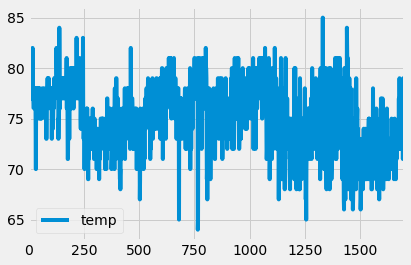

In [56]:
june_df.plot()

In [42]:
dec_df= pd.DataFrame(dec_data_list, columns= ['temp'])

In [43]:
dec_df.describe()

,temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


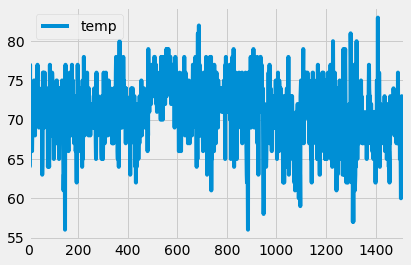

In [57]:
dec_df.plot()

## Recommendation

In [21]:
# I recommend analysing the tourist data.
# I recommend to further analyse tourist's seasonal pereference, eg, ice-cream flavors, surfing.

## Difference

In [ ]:
# There aren't significant temprature difference beteween the two months, besides being on different seasons .
# December's temprature is little colder comparing to June's. Thus, expect less people to surf while the ice-cream bussiness
# expected to remain unaffected.